In [65]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import gym
import d4rl

In [66]:
PATH = "/tmp/CQL_runs"

/home/kostrikov/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/kostrikov/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/kostrikov/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/kostrikov/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/kostrikov/anaconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%

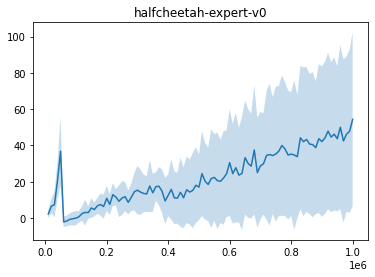

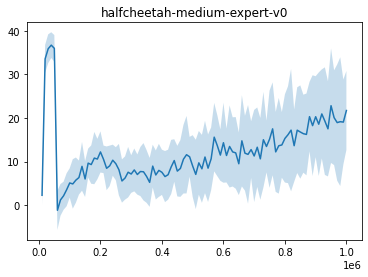

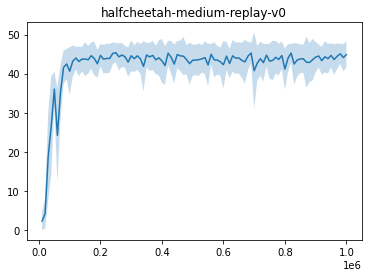

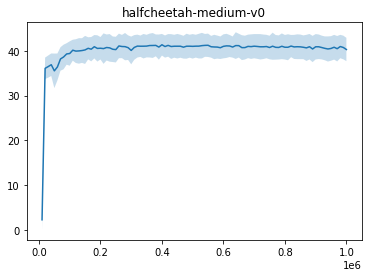

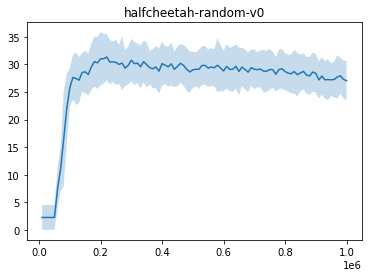

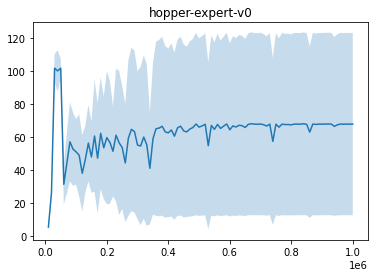

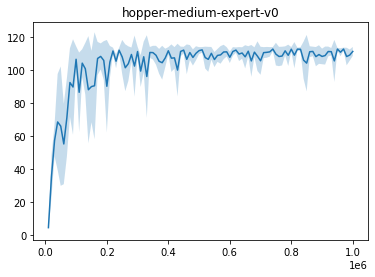

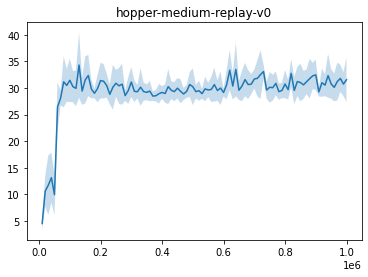

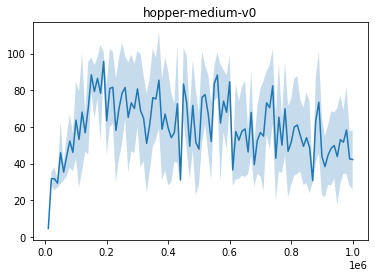

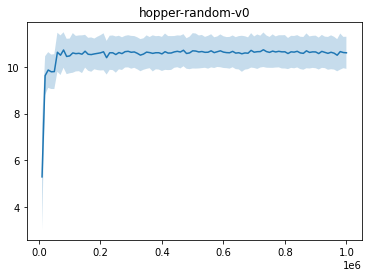

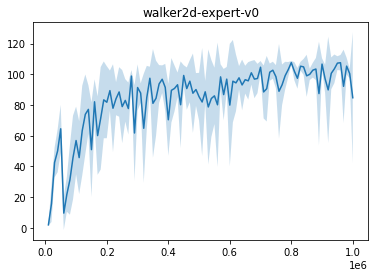

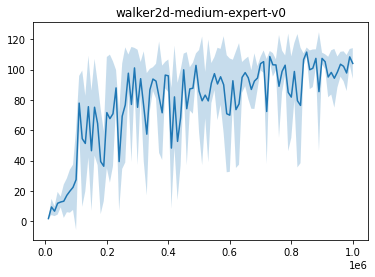

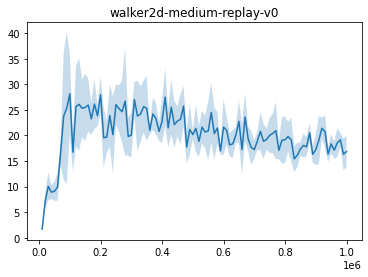

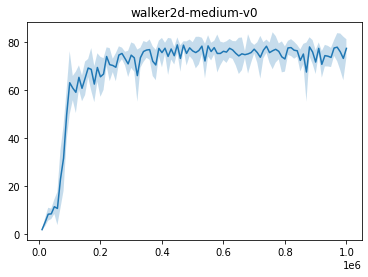

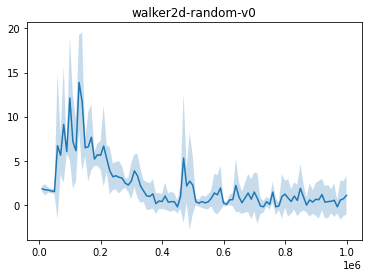

In [67]:
data = {}

for env in os.listdir(PATH):
    if env not in data:
        data[env] = {}
    env_dir = os.path.join(PATH, env)
    for seed in os.listdir(env_dir):
        exp_dir = os.path.join(env_dir, seed, env)
        exps_dir = os.listdir(exp_dir)
        if len(exps_dir) > 1:
            print("ERROR")
        else:
            exp_dir = os.path.join(exp_dir, exps_dir[0])
        exp_file = os.path.join(exp_dir, 'progress.csv')
        try:
            csv_data = pandas.read_csv(exp_file)
            for k, v in csv_data['evaluation/Average Returns'].items():
                if k not in data[env]:
                    data[env][k] = []
                data[env][k].append(v)
        except:
            print(f"Skipping {exp_file}")
            
for env in sorted(data.keys()):
    gym_env = gym.make(env)
    xs = []
    means = []
    stds = []
    
    for k in data[env].keys():
        if len(data[env][k]) > 0:
            xs.append((k + 1) * 10_000)
            means.append(np.mean(data[env][k]))
            stds.append(np.std(data[env][k]))
    
    means = np.array(means, dtype=np.float32)
    stds = np.array(stds, dtype=np.float32)
    
    means = gym_env.get_normalized_score(means) * 100.0
    stds = gym_env.get_normalized_score(stds) * 100.0
    
    plt.figure()
    plt.title(env)
    plt.plot(xs, means)
    plt.fill_between(xs, means - stds, means + stds, alpha=0.25)